#### Before you start, create a repository for this session, as you will be doing code reviews of your exercises, add your team as collaborators
✅✅✅✅

#### Exercise 1: import necessary libraries to carry out analysis using pandas and to visualise the dataset [brazilian_amazon_fires_1999_2019.csv](brazilian_amazon_fires_1999_2019.csv)

In [1]:
import pandas as pd

df = pd.read_csv('brazilian_amazon_fires_1999_2019.csv')

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1


#### Exercise 2: Load the data and display the first few rows


In [25]:
df.head(15)

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1
5,1999,1,RORAIMA,3.403225,-60.622853,15
6,1999,2,AMAPA,-0.155000,-52.683100,1
7,1999,2,AMAZONAS,-2.763167,-63.429781,43
8,1999,2,MATO GROSSO,-12.619988,-55.375363,8
9,1999,2,PARA,-2.150617,-53.509911,285


In [4]:
df.iloc[0:3, 0:5]  # first 3 rows and first 5 columns

,year,month,state,latitude,longitude
0,1999,1,AMAZONAS,-2.371113,-59.899933
1,1999,1,MARANHAO,-2.257395,-45.487831
2,1999,1,MATO GROSSO,-12.660633,-55.057989


#### Exercise 3: Display basic summary statistics and check for missing values

 tip: [check the documentation](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)

In [5]:
df.describe()

,year,month,latitude,longitude,firespots
count,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000
mean,2009.267110,6.704848,-5.439282,-56.510314,1167.417776
std,5.963029,3.431949,4.852439,7.382619,2959.558714
min,1999.000000,1.000000,-14.431908,-73.085000,1.000000
25%,2004.000000,4.000000,-9.946974,-62.376004,16.000000
50%,2009.000000,7.000000,-5.808292,-55.876480,121.000000
75%,2014.000000,10.000000,-2.595169,-50.396154,755.000000
max,2019.000000,12.000000,4.151000,-44.188000,37926.000000


In [8]:
df['state'].value_counts()

MATO GROSSO    252
AMAZONAS       250
PARA           250
RONDONIA       246
RORAIMA        243
MARANHAO       241
TOCANTINS      221
ACRE           204
AMAPA          197
Name: state, dtype: int64

In [31]:
# group by year and rank the states by the number of fires
df.groupby('year')['state'].value_counts()

year  state      
1999  MATO GROSSO    12
      PARA           12
      AMAZONAS       11
      RONDONIA       11
      RORAIMA        11
                     ..
2019  PARA           12
      RONDONIA       12
      RORAIMA        12
      TOCANTINS      12
      AMAPA           7
Name: state, Length: 189, dtype: int64

#### Exercise 4: Exploratory Data Analysis - Count of firespots by state

- Analyze the distribution of firespots across different states.

In [32]:
#grouping the data by 'state' and sum the number of 'firespots'
df.groupby('state')['firespots'].sum()

state
ACRE           126471
AMAPA           39337
AMAZONAS       188483
MARANHAO       160543
MATO GROSSO    595378
PARA           942283
RONDONIA       340517
RORAIMA         46981
TOCANTINS       16254
Name: firespots, dtype: int64

In [33]:
#sorting the results by the number of firespots in descending order
df.groupby('state')['firespots'].sum().sort_values(ascending=False)

state
PARA           942283
MATO GROSSO    595378
RONDONIA       340517
AMAZONAS       188483
MARANHAO       160543
ACRE           126471
RORAIMA         46981
AMAPA           39337
TOCANTINS       16254
Name: firespots, dtype: int64

<AxesSubplot:xlabel='state'>

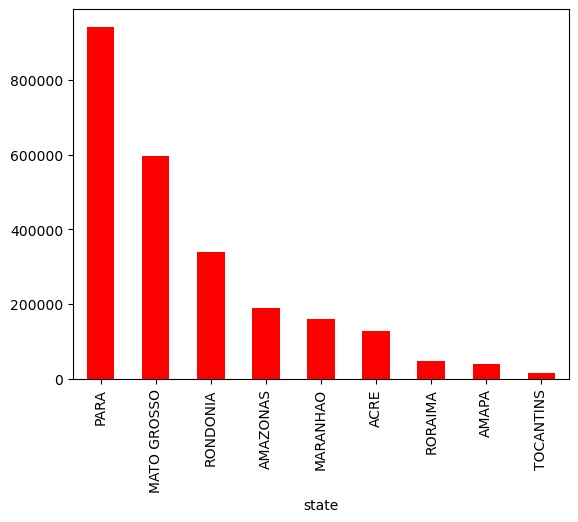

In [40]:
#plot the results using a bar plot

df.groupby('state')['firespots'].sum().sort_values(ascending=False).plot(kind='bar', color = 'red')

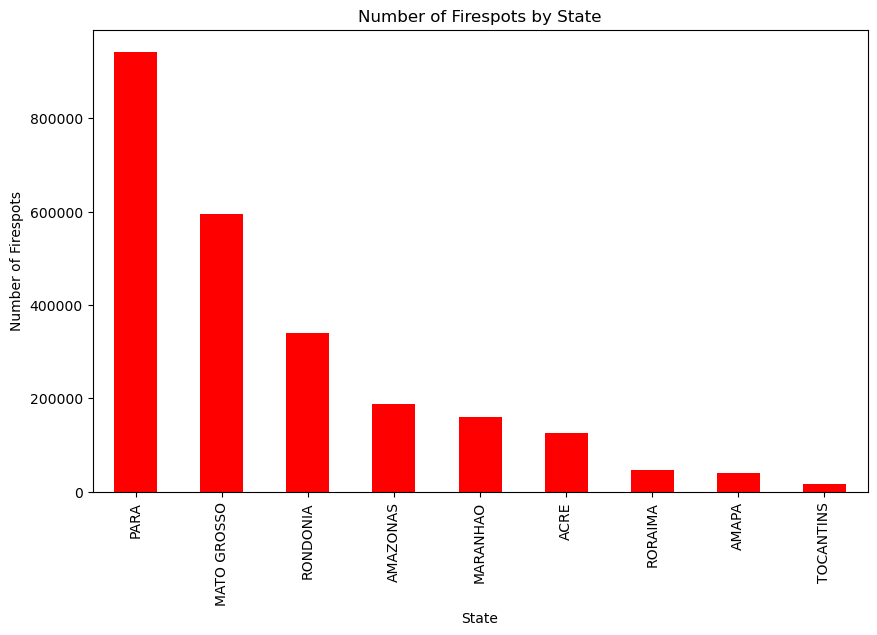

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df.groupby('state')['firespots'].sum().sort_values(ascending=False).plot(kind='bar', color = 'red')
plt.xlabel('State')
plt.ylabel('Number of Firespots')
plt.title('Number of Firespots by State')
plt.show()

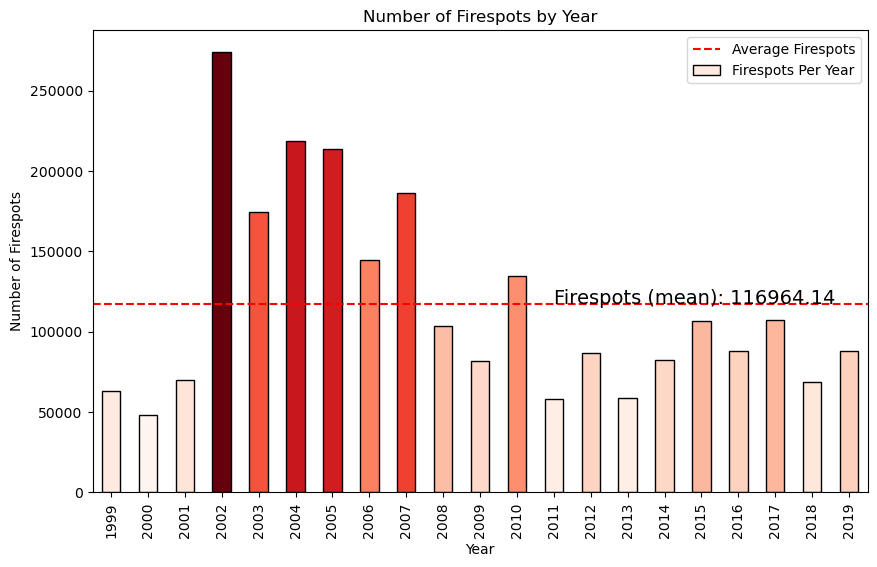

In [82]:
# plot by year and number of firespots

import matplotlib.colors as mcolors

firespots_by_year = df.groupby('year')['firespots'].sum()
norm = plt.Normalize(firespots_by_year.min(), firespots_by_year.max())
colors = plt.cm.Reds(norm(firespots_by_year.values))

plt.figure(figsize=(10, 6))
firespots_by_year.plot(kind='bar', color=colors, edgecolor='black')

# an average line and the number of average firespots
plt.axhline(firespots_by_year.mean(), color='red', linewidth=1.5, linestyle='--')
plt.text(12, firespots_by_year.mean(), 'Firespots (mean): {:.2f}'.format(firespots_by_year.mean()), fontsize=14)


plt.xlabel('Year')
plt.ylabel('Number of Firespots')
plt.title('Number of Firespots by Year')
plt.legend(['Average Firespots', 'Firespots Per Year'])
plt.show()


### Exercise 5: Code Review your analysis and plot
- use github to do this, you can do this on someone else's repository but you will need to **fork** it or be added as collaborator

This is a very useful post:

[code review on github](https://linearb.io/blog/code-review-on-github)


##### Forking a Repository

What is Forking? Forking creates a personal copy of someone else's repository under your Git account. It's typically used when you want to contribute to a project that you don't have direct write access to.

When to Fork: Contributing to Open Source Projects: If you're contributing to an open-source project or any repository where you don't have write permissions, you'll fork the repository to create your own version that you can work on. Personal Changes: If you want to experiment with or make personal changes to someone else's project without affecting the original project, you fork it.

How to Fork: On GitHub (or similar platforms), navigate to the repository you want to contribute to and click the “Fork” button. This creates a copy of the repository under your account.

Next Steps After Forking: Clone the Forked Repository: Once you've forked the repository, clone it to your local machine to start working on it.

git clone https://github.com/your-username/forked-repo.git


Make Changes: After cloning, you can create branches, make changes, and commit them as you would with any other repository.

Submit a Pull Request: Once your changes are ready, you can submit a pull request from your forked repository back to the original repository to propose your changes.


##### **github code review**

**Create a New Branch:**
- Start by creating a new branch from your main branch (usually main or master).
- Make your changes or implement the new feature in this branch.


`git checkout -b my-feature-branch
`     

**Commit Your Changes:**

After making the necessary changes, commit them to your branch.

`git add .`
`git commit -m "Implemented feature X"`

     
**Push the Branch to Your Repository:**
**Push the new branch to your remote repository.**

`git push origin my-feature-branch
`
     
**Create a Pull Request:**

- Go to your repository on GitHub.
- You’ll see an option to create a pull request for the branch you just pushed. Click on it and fill in the PR details.

**Review your code:
**
Once the pull request is created, you can review your changes in the PR interface. This allows you to see a diff of your changes, add comments, and reflect on the code as if you were a reviewer.

- explore the code

- is there anything you are particularly interested in? they used a different color? you dont understand something? you would like to know more about their choices?

You can also take advantage of any automated tests, linting, or CI/CD pipelines you have set up to validate your changes.

**Approve and merge the PR:
**
If you’re satisfied with the review, you can approve and merge the pull request. Alternatively, you can make further changes by pushing additional commits to the same branch.

After merging, you can delete the branch if it’s no longer needed.






#### Exercise 6: Pair programming 

The task is to show firespost on a map using matplotlib with OpenStreetMap

- with the same dataset, now show the firesposts in a map
- you already have access to the data latitude and longitud
- since we want to show the data on a map, you will need to use a library that lets you do this in an easy, straighfoward way - matplotlib has geopandas but there are also other libraries 
- ~~let's use plotly.express   > particularly useful for generating quick, interactive plots with minimal code.~~
- ~~you will need to install plotly~~

- ~~check the documentation for guide[https://plotly.com/python/mapbox-density-heatmaps/](https://plotly.com/python/mapbox-density-heatmaps/)~~


In [ ]:
!pip install Basemap
!pip install ipyleaflet # interative maps in jupyter notebooks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.6/569.6 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 38.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 19.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
from datetime import datetime

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 8)

In [ ]:
df = pd.read_csv('brazilian_amazon_fires_1999_2019.csv')

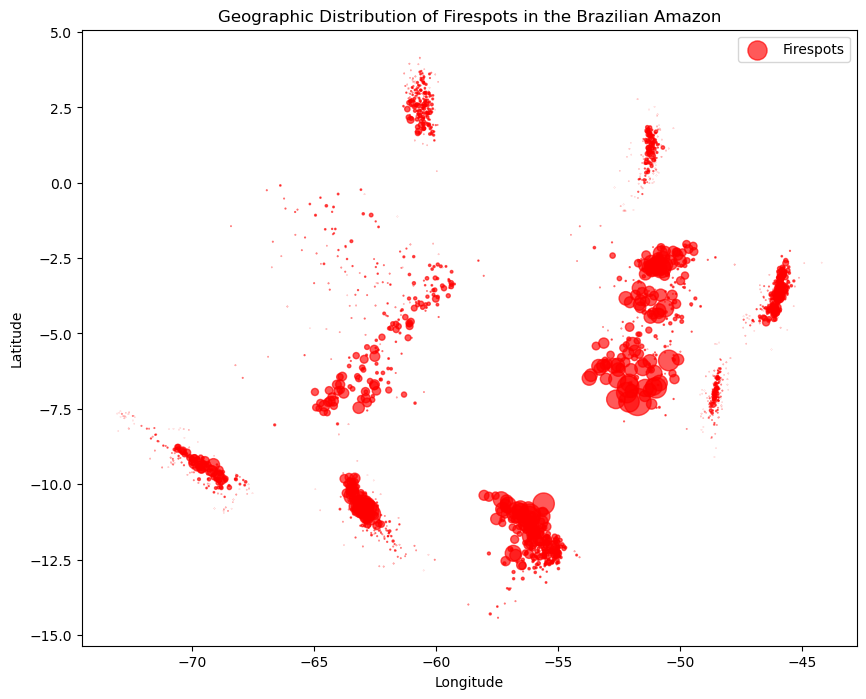

In [113]:
plt.scatter(df['longitude'], df['latitude'], c='r', alpha=0.65, s=df['firespots']/100) # s is the size of the dots
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Firespots in the Brazilian Amazon")
plt.legend(['Firespots'])
plt.show()


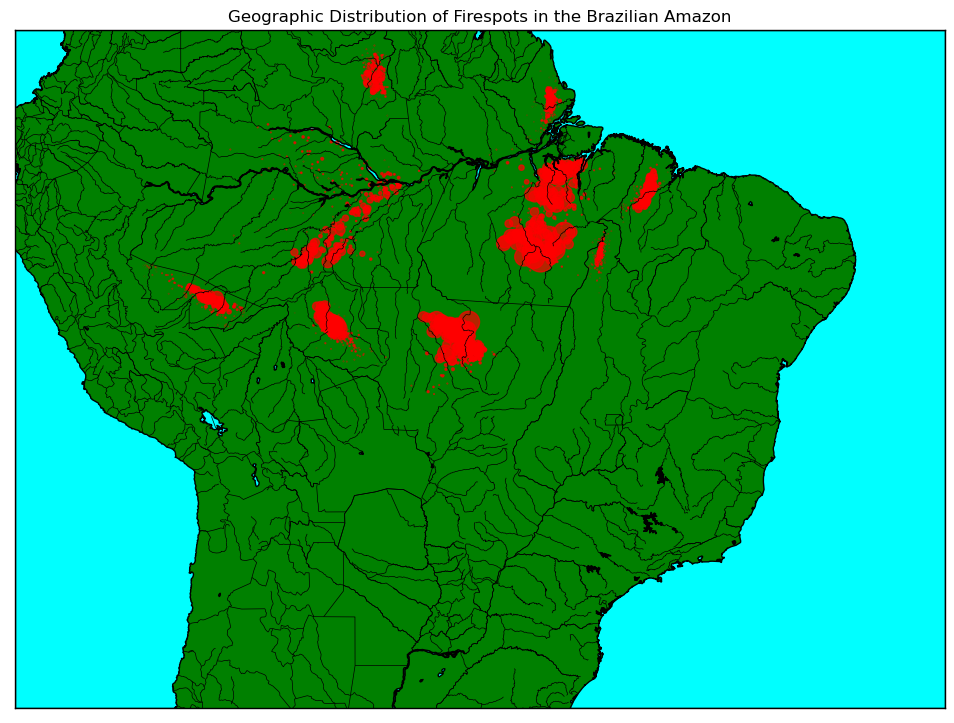

In [99]:
# Basemap
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(12, 9))
m = Basemap(projection='merc', llcrnrlat=-30, urcrnrlat=5, llcrnrlon=-80, urcrnrlon=-30, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawrivers()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='green', lake_color='aqua')
m.scatter(df['longitude'].values, df['latitude'].values, latlon=True, c='r', alpha=0.7, s=df['firespots']/100)
plt.title("Geographic Distribution of Firespots in the Brazilian Amazon")
plt.show()

In [ ]:
# Interactive map
from ipyleaflet import  Map, CircleMarker, LayerGroup


df_1999 = df[df['year'] == 1999] # filter the data in 1999
center = [-14.2350, -51.9253]
zoom = 4
satellite_map = Map(center=center, zoom=zoom, layout={'height':'700px'})


markers_layer = LayerGroup()
satellite_map.add_layer(markers_layer)

for idx, row in df_1999.iterrows():
    marker = CircleMarker()
    marker.location = (row['latitude'], row['longitude'])
    marker.radius = 5
    marker.color = "red"
    marker.fill_color = "red"
    markers_layer.add_layer(marker)

satellite_map

Map(center=[-14.235, -51.9253], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

In [118]:
# use plotly to create an interactive map
import plotly.express as px

fig = px.scatter_mapbox(df, lat='latitude', lon='longitude', color='firespots', size='firespots', zoom=3.5)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
